In [1]:
# Importing Libs
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
pd.set_option('MAX_ROWS', None) # Setting pandas to display a N number of columns
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn import tree # Modelling a tree
from sklearn.impute import SimpleImputer # Perform Imputation
from imblearn.over_sampling import SMOTE # Perform oversampling
from sklearn.preprocessing import OneHotEncoder # Perform OneHotEnconding
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict # Cross Validation
from sklearn.linear_model import LogisticRegression # Modelling
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score # Evaluating the Model


#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-airline-flight-delays-and-cancellations/jantojun2020.csv
/kaggle/input/covid19-airline-flight-delays-and-cancellations/ColumnDescriptions.txt
/kaggle/input/flight-delay-prediction/Jan_2019_ontime.csv
/kaggle/input/flight-delay-prediction/Jan_2020_ontime.csv
/kaggle/input/2019-airline-delays-and-cancellations/train_sets_documentation.txt
/kaggle/input/2019-airline-delays-and-cancellations/raw_data_documentation.txt
/kaggle/input/2019-airline-delays-and-cancellations/full_data_flightdelay.csv
/kaggle/input/2019-airline-delays-and-cancellations/train.csv
/kaggle/input/2019-airline-delays-and-cancellations/test.csv
/kaggle/input/2019-airline-delays-and-cancellations/raw_data/T3_AIR_CARRIER_SUMMARY_AIRPORT_ACTIVITY_2020.csv
/kaggle/input/2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_2020_01.csv
/kaggle/input/2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_03.csv
/kaggle/input/2019-airline-delays-and-cancellations/raw_data/B43_AIRCRAFT_

# Collecting the data

In [3]:
# Collecting data
df_2019 = pd.read_csv('/kaggle/input/flight-delay-prediction/Jan_2019_ontime.csv')
df_2020 = pd.read_csv('/kaggle/input/flight-delay-prediction/Jan_2020_ontime.csv')
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


# Problem definition.

Predict whether a particular flight will be delayed or not. The data refer to flights from January-19 and January-20, so we can use the data to predict flight delays in January for the next period (year-2020).

 - Binary classification problem.
 - 21 variables per dataset.
 - Dataset with flights from Jan-19 and Jan-20.
 - Variable response is 'ARR_DEL15'

Variable dictionary:

    'DAY_OF_MONTH': Day of the month.
    'DAY_OF_WEEK': Day of the week.
    'OP_UNIQUE_CARRIER': Unique transport code.
    'OP_CARRIER_AIRLINE_ID': Unique aviation operator code.
    'OP_CARRIER': IATA code of the operator.
    'TAIL_NUM': Tail number.
    'OP_CARRIER_FL_NUM': Flight number.
    'ORIGIN_AIRPORT_ID': Origin airport ID.
    'ORIGIN_AIRPORT_SEQ_ID': Origin airport ID - SEQ.
    'ORIGIN': Airport of Origin.
    'DEST_AIRPORT_ID': ID of the destination airport.
    'DEST_AIRPORT_SEQ_ID': Destination airport ID - SEQ.
    'DEST': Destination airport.
    'DEP_TIME': Flight departure time.
    'DEP_DEL15': Departure delay indicator
    'DEP_TIME_BLK': block of time (hour) where the match has been postponed.
    'ARR_TIME': Flight arrival time.
    'ARR_DEL15': Arrival delay indicator.
    'CANCELLED': Flight cancellation indicator.
    'DIVERTED': Indicator if the flight has been diverted.
    'DISTANCE': Distance between airports.

# Unifying the bases.

We will unify the bases of 2019 and 2020 to analyze the data as a whole.

In [4]:
#Creating year indicator.
df_2019['year'] = 2019
df_2020['year'] = 2020

#Checking if the bases have the same columns
print(set(df_2020.columns) == set(df_2019.columns))

#Generating the unique base
dataset = pd.concat([df_2019,df_2020])
print(dataset.shape)
print('\n')
dataset.head()

True
(1191331, 23)




,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


# Initial data selection.
We will select the variables that we will work on to discover patterns in the data.
  
We will remove all identifiers with the exception 'OP_CARRIER_FL_NUM', which we will transform into an index of our database. The main reason for remove identifiers is that they are irrelevant for analysis.

In [5]:
data = dataset.drop(['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21'], axis=1)
data = data.set_index('OP_CARRIER_FL_NUM')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
OP_CARRIER_FL_NUM,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


# # Cleaning the dataset / Discretization

Missing values:

Regarding the missing values, considering that they make up 2.5% less of the data, we will adopt the strategy of eliminating them by the line from our database.

Data Type:

We will transform the types of the variables 'DISTANCE', 'ARR_TIME', 'DEP_TIME', 'CANCELED', 'DIVERTED', 'DEP_DEL15', 'ARR_DEL15' to categorical dtype, as they are categorical variables.

Discretization:

We will create distance ranges (categories) for the 'DISTANCE' variable.
The advantage is the improvement in the understanding of the knowledge discovered, reduction of the processing time when training some algorithm, and reduction of the search space.

In [6]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
OP_CARRIER_FL_NUM,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [7]:
#Dataframe summary
pd.DataFrame({'unicos':data.nunique(),
              'missing': data.isna().sum()/data.count(),
              'tipo':data.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.000000,int64
DAY_OF_WEEK,7,0.000000,int64
ORIGIN,353,0.000000,object
DEST,353,0.000000,object
DEP_TIME,1440,0.019700,float64
DEP_DEL15,2,0.019733,float64
DEP_TIME_BLK,19,0.000000,object
ARR_TIME,1440,0.020679,float64
ARR_DEL15,2,0.022399,float64
CANCELLED,2,0.000000,float64


In [8]:
#Missing values
data.dropna(inplace=True)

#Transformation of data types
colunas = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
for col in colunas:
  data[col] = data[col].astype('category') 

#Discretization
data['DISTANCE_cat'] = pd.qcut(data['DISTANCE'], q=4)

In [9]:
#Dataframe summary after pre-processing
pd.DataFrame({'unicos':data.nunique(),
              'missing': data.isna().mean()*100,
              'tipo':data.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.0,category
DAY_OF_WEEK,7,0.0,category
ORIGIN,353,0.0,object
DEST,353,0.0,object
DEP_TIME,1440,0.0,float64
DEP_DEL15,2,0.0,category
DEP_TIME_BLK,19,0.0,object
ARR_TIME,1440,0.0,float64
ARR_DEL15,2,0.0,category
CANCELLED,1,0.0,category


# Exploratory Analysis

Questions we want to answer from the data!
  - The concentration of delay and non-delay both on departure and on arrival?
  - The proportion of delayed flights that were diverted?
  - Are delays due to day_of_week and day_of_month?
  - The concentration of delay's by 'DEP_TIME_BLK'?
  - Which airport in Origin stands out in delays?
  - Which airport in Destination stands out in delays?

In [10]:
#check data
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]"
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]"
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]"
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]"
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]"


Text(0, 0.5, 'Freq')

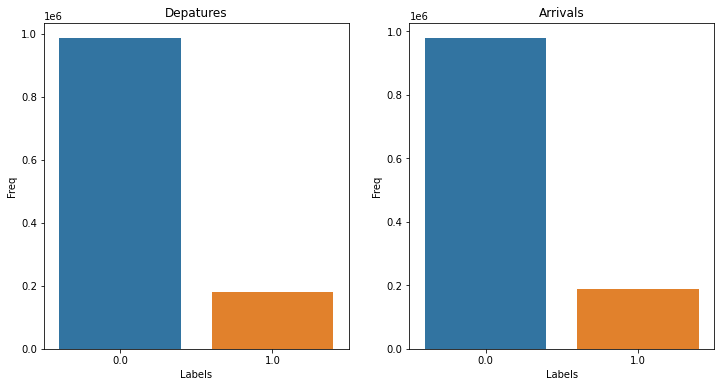

In [11]:
#The concentration of delay and timely arrivals both on departure and on arrival?
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(data['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(data['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

From the graphs above, we can see a greater concentration of flights with timely departures and arrivals.

Another insight that we can observe is that the proportions are very similar in the two variables, that is, it is very likely that the departures or not in delay are very important for predictive modeling about delayed arrivals.

Text(0, 0.5, 'Freq')

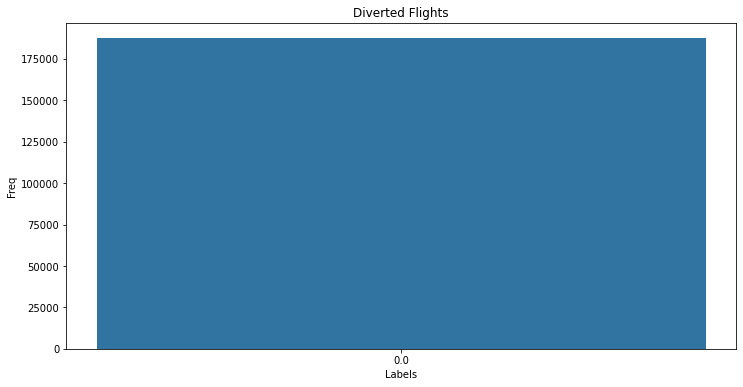

In [12]:
# Percentage of delayed flights that are canceled or diverted?
voos_atrasados = data.loc[data['ARR_DEL15'] == 1,['DIVERTED']]


f, ax= plt.subplots(figsize=(12,6))

#Desvios
desv = sns.countplot(voos_atrasados['DIVERTED'], ax=ax)
desv.set_title('Diverted Flights')
desv.set_xlabel('Labels')
desv.set_ylabel('Freq')

As we can see any flight with delay was diverted.

In [13]:
# Delays due to day_of_week and day_of_month?

week = data[['DAY_OF_WEEK','ARR_DEL15']].groupby('DAY_OF_WEEK').sum().sort_values(by='ARR_DEL15',ascending=False)
week['PERCENTUAL'] = week['ARR_DEL15']/(week['ARR_DEL15'].sum())*100
month = data[['DAY_OF_MONTH','ARR_DEL15']].groupby('DAY_OF_MONTH').sum().sort_values(by='ARR_DEL15',ascending=False)
month['PERCENTUAL'] = month['ARR_DEL15']/(month['ARR_DEL15'].sum())*100

print('>> Delayed flights by weekday<<')
print(week)
print('\n')
print('>> Delayed flights by monthday <<')
print(month)

>> Delayed flights by weekday<<
             ARR_DEL15  PERCENTUAL
DAY_OF_WEEK                       
4              34414.0   18.353448
5              30724.0   16.385522
3              27485.0   14.658119
1              25291.0   13.488030
7              23988.0   12.793122
6              23084.0   12.311007
2              22521.0   12.010752


>> Delayed flights by monthday <<
              ARR_DEL15  PERCENTUAL
DAY_OF_MONTH                       
24               8594.0    4.583296
2                8009.0    4.271307
23               7810.0    4.165178
18               7717.0    4.115580
3                7523.0    4.012117
17               7518.0    4.009450
16               7252.0    3.867589
11               6959.0    3.711328
4                6942.0    3.702262
21               6877.0    3.667596
31               6820.0    3.637198
6                6418.0    3.422806
13               6299.0    3.359341
25               6254.0    3.335342
1                6094.0    3.250012
10   

Day of week 4 (Wednesday) has the highest incidence of delays.

Regarding the days of the month, although more distributed, the 24th and 2nd are the ones that stand out.

In [14]:
# Concentration of delays due to 'DEP_TIME_BLK'?
time_blk = data[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk['PERCENTUAL'] = time_blk['ARR_DEL15']/(time_blk['ARR_DEL15'].sum())*100
time_blk

,ARR_DEL15,PERCENTUAL
DEP_TIME_BLK,,
1700-1759,14875.0,7.933037
1800-1859,14020.0,7.477054
1600-1659,13292.0,7.088802
1500-1559,12760.0,6.805079
1900-1959,12640.0,6.741082
1400-1459,12618.0,6.729349
1200-1259,11761.0,6.272299
1100-1159,11181.0,5.962977
1300-1359,11101.0,5.920312


Most delays occur between 4:00 pm and 7:00 pm, in the late afternoon.

In [15]:
# Which 'Origin' airport stands out in delay?
origin_later = data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
origin_later['PERCENTUAL'] = origin_later['DEP_DEL15']/(origin_later['DEP_DEL15'].sum())*100
origin_later.head()

,DEP_DEL15,PERCENTUAL
ORIGIN,,
ORD,10639.0,5.918710
DFW,8559.0,4.761560
ATL,7737.0,4.304264
DEN,6154.0,3.423606
CLT,5717.0,3.180493


We note that ORD (Chicago O'Hare International Airport) and DFW (Dallas / Ft Worth, TX, USA - Dallas Ft Worth International) airports are the ones with the most delays.

In [16]:
# Which airport of Destination stands out in delays?
dest_later = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_later['PERCENTUAL'] = dest_later['ARR_DEL15']/(dest_later['ARR_DEL15'].sum())*100
dest_later.head()

,ARR_DEL15,PERCENTUAL
DEST,,
ORD,10170.0,5.423798
DFW,8667.0,4.622227
ATL,7263.0,3.873455
LGA,7077.0,3.774259
SFO,6114.0,3.260678


Interestingly, the same airports with the longest delays at origin are also the ones with the highest delays at destination airports. In the modeling stage, we can perform the OneHotEncoder and maintain only the 3 to 5 largest airports to avoid high dimensionality.

# Creating Variables

Through the analysis of the first graph of the exploratory analysis, we had the insight that the delays in the departure of the flights (DEP_DEL15) can help us to model the delays in the arrival (ARR_DEL15) of the flights. That way we can create related variables as below.

-We can create ARR_TIME_BLOCK.

-The number of delays within a DEP_TIME_BLK.

-The number of delays DEP_DEL15 per ORIGIN.

-The number of delays ARR_DEL15 per DEST.

In [17]:
# Helper function to create ARR_TIME_BLOCK
def arr_time(x):

  if x >= 600 and x <= 659:
    return '0600-0659'
  elif x>=1400 and x<=1459:
    return '1400-1459'
  elif x>=1200 and x<=1259:
    return '1200-1259'
  elif x>=1500 and x<=1559:
    return '1500-1559'
  elif x>=1900 and x<=1959:
    return '1900-1959'
  elif x>=900 and x<=959:
    return '0900-0959'
  elif x>=1000 and x<=1059:
    return  '1000-1059'
  elif x>=2000 and x<=2059:
    return '2000-2059'
  elif x>=1300 and x<=1359:
    return '1300-1359'
  elif x>=1100 and x<=1159:
    return '1100-1159'
  elif x>=800 and x<=859:
    return '0800-0859'
  elif x>=2200 and x<=2259:
    return '2200-2259'
  elif x>=1600 and x<=1659:
    return '1600-1659'
  elif x>=1700 and x<=1759:
    return '1700-1759'
  elif x>=2100 and x<=2159:
    return '2100-2159'
  elif x>=700 and x<=759:
    return '0700-0759'
  elif x>=1800 and x<=1859:
    return '1800-1859'
  elif x>=1 and x<=559:
    return '0001-0559'
  elif x>=2300 and x<=2400:
    return '2300-2400'

In [18]:
# We can create ARR_TIME_BLOCK.
data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.reset_index(inplace=True)
data.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]",1600-1659
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]",1300-1359
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]",1600-1659
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]",1900-1959


In [19]:
# Amount of delays within a DEP_TIME_BLK.
count_time_blk = data[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
count_time_blk.reset_index(inplace=True)
count_time_blk.head()
data1 = data.merge(count_time_blk, left_on='DEP_TIME_BLK', right_on='DEP_TIME_BLK') 
data1.rename({'ARR_DEL15_y':'quant_dep_time_blk','ARR_DEL15_x':'ARR_DEL15' }, inplace=True, axis=1)
data1.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0
1,3290,1,2,CAK,ATL,557.0,0.0,0600-0659,737,0.0,0.0,0.0,528.0,2019,"(368.0, 641.0]",0700-0759,8334.0
2,3330,1,2,GTR,ATL,636.0,0.0,0600-0659,850,0.0,0.0,0.0,241.0,2019,"(30.999, 368.0]",0800-0859,8334.0
3,3335,1,2,LFT,ATL,553.0,0.0,0600-0659,827,0.0,0.0,0.0,503.0,2019,"(368.0, 641.0]",0800-0859,8334.0
4,3349,1,2,AGS,ATL,601.0,0.0,0600-0659,704,0.0,0.0,0.0,143.0,2019,"(30.999, 368.0]",0700-0759,8334.0


In [20]:
# Number of delays DEP_DEL15 per ORIGIN.
count_later_origin = data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
count_later_origin.reset_index(inplace=True)
count_later_origin.head()
data2 = data1.merge(count_later_origin, left_on='ORIGIN', right_on='ORIGIN')
data2.rename({'DEP_DEL15_y':'count_later_origin','DEP_DEL15_x':'DEP_DEL15' }, inplace=True, axis=1)
data2.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk,count_later_origin
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0
1,3831,1,2,GNV,MIA,621.0,0.0,0600-0659,734,0.0,0.0,0.0,294.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0
2,3426,2,3,GNV,ATL,546.0,0.0,0600-0659,655,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0600-0659,8334.0,114.0
3,3426,3,4,GNV,ATL,555.0,0.0,0600-0659,718,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0
4,3831,3,4,GNV,MIA,619.0,0.0,0600-0659,723,0.0,0.0,0.0,294.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0


In [21]:
# Number of delays ARR_DEL15 per DEST.
count_later_dest = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
count_later_dest.reset_index(inplace=True)
count_later_dest.head()
data3 = data2.merge(count_later_dest, left_on='DEST', right_on='DEST')
data3.rename({'ARR_DEL15_y':'count_later_dest','ARR_DEL15_x':'ARR_DEL15' },inplace=True, axis=1)
data3.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk,count_later_origin,count_later_dest
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0,7263.0
1,3426,2,3,GNV,ATL,546.0,0.0,0600-0659,655,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0600-0659,8334.0,114.0,7263.0
2,3426,3,4,GNV,ATL,555.0,0.0,0600-0659,718,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0,7263.0
3,3426,4,5,GNV,ATL,544.0,0.0,0600-0659,703,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0,7263.0
4,381,5,6,GNV,ATL,605.0,0.0,0600-0659,730,1.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0,7263.0


# Training Final Model
For training the final model, we will train the model on the 2019 data and use the 2020 data for validation. Such an approach makes sense since we have data for January of each year and we can predict what will happen in January of the following year.

In [22]:
#Data Preparation
base_final = data3.copy()
base_final.drop(['DEP_TIME','ARR_TIME','OP_CARRIER_FL_NUM'], inplace=True, axis=1)
base_final.set_index('year',inplace=True)

In [23]:
# Separate target, numeric and categorical variables 'ORIGIN', 'DEST'

target_final = base_final[['ARR_DEL15']]

cat_vars_final = base_final.select_dtypes(['object','category'])
cat_vars_final = cat_vars_final.loc[:, ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_DEL15','DEP_TIME_BLK','CANCELLED',
                            'DIVERTED','DISTANCE_cat','ARR_TIME_BLOCK']]

#One Hot Encoder

enc = OneHotEncoder().fit(cat_vars_final)

cat_vars_ohe_final = enc.transform(cat_vars_final).toarray()
cat_vars_ohe_final = pd.DataFrame(cat_vars_ohe_final, index= cat_vars_final.index, 
                      columns=enc.get_feature_names(cat_vars_final.columns.tolist()))

In [24]:
#Logisitc Regression Model


#Dividing into training and test data: 2019 - training, 2020 - testing
target_2019_final = target_final[target_final.index == 2019]
target_2020_final = target_final[target_final.index == 2020]

cat_vars_ohe_2019_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2019]
cat_vars_ohe_2020_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2020]


#Instantizing Model
lr_model_final = LogisticRegression(C=1.0,n_jobs=-1,verbose=1, random_state=154)

#training
lr_model_final.fit(cat_vars_ohe_2019_final, target_2019_final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


LogisticRegression(n_jobs=-1, random_state=154, verbose=1)

## Evaluation of the Final Model
The average AUC in training data was 0.89, we can see that dividing the data by time (2019.2020) generated a good increase in our control metric.

For the test data, the AUC fell slightly 0.88 which is very good, it indicates that we are not suffering from overfitting. However, if we analyze the recall we observe the value of 0.73, that is, of all 'delay' events we are correctly classifying 73% of our target category.

If it is very important to have a better performance in classifying our target category (for example if we were talking about classifying diseases), we could evaluate the threshold and favor the recall over precision, in this way, we would start to classify many flights that do not would delay, however, we would get right most of the delays.

In [25]:
#Validação Cruzada -Treino
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(lr_model_final,cat_vars_ohe_2019_final,target_2019_final, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f'A média: {np.mean(result)}')
print(f'Limite Inferior: {np.mean(result)-2*np.std(result)}')
print(f'Limite Superior: {np.mean(result)+2*np.std(result)}')

A média: 0.8938687144459884
Limite Inferior: 0.8916026280546664
Limite Superior: 0.8961348008373103


In [26]:
#Test Data

# Predict
pred = lr_model_final.predict(cat_vars_ohe_2020_final)
pred_prob = lr_model_final.predict_proba(cat_vars_ohe_2020_final)

# print classification report
print("Relatório de Classificação:\n", 
       classification_report(target_2020_final, pred, digits=4))

# print the area under the curve
print(f'AUC: {roc_auc_score(target_2020_final,pred_prob[:,1])}')

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9580    0.9614    0.9597    516983
         1.0     0.7521    0.7354    0.7436     82285

    accuracy                         0.9304    599268
   macro avg     0.8551    0.8484    0.8517    599268
weighted avg     0.9298    0.9304    0.9301    599268

AUC: 0.8802252715380758


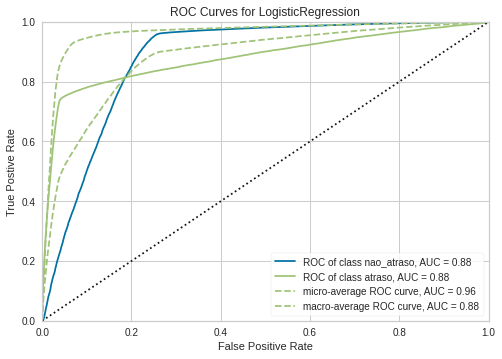

In [27]:
#ROC Curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr_model_final, classes=["nao_atraso", "atraso"])

visualizer.fit(cat_vars_ohe_2019_final, target_2019_final)         
visualizer.score(cat_vars_ohe_2020_final, target_2020_final)                                   
visualizer.show()

The ROC curve is a measure of performance for classification problems at different thresholds.

Through the ROC curves above, we can see that our model has, in general, a true positive rate for class 0.0 higher than for our target category. However, with low thresholds, we observed a high TPR for our target class with a low FPR, that is, at a low threshold our model would be able to distinguish the positive class with greater success.

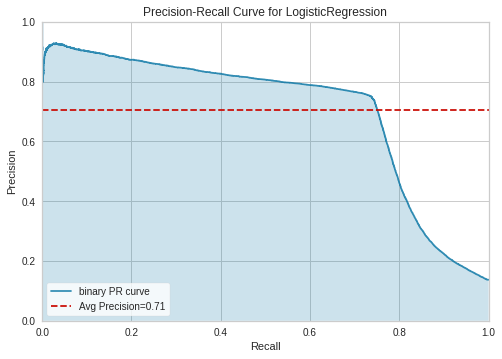

In [28]:
from yellowbrick.classifier import precision_recall_curve
viz = precision_recall_curve(lr_model_final, cat_vars_ohe_2019_final, target_2019_final, cat_vars_ohe_2020_final, target_2020_final)

The plot above shows us the trade-off between precision and recall. If we seek a greater recall, to favor our positive class, we will sacrifice the precision of the model.

Manipulating the threshold
Many classifiers use a decision_function to generate a positive class score or the predict_proba function to compute the probability of the positive class. If the score or probability is higher than the threshold then the positive class is selected, otherwise, the negative class is selected.

Here in our case we manipulate the threshold, use the value of -3, compared to the score generated by the decision_function (distance to a 'hyperplane' of equal probabilities for the classes) and we obtained a recall of 0.94, that is, we would hit 94% of our positive class, however, at the cost of having a precision of only 18%.

In [29]:
y_scores_final = lr_model_final.decision_function(cat_vars_ohe_2020_final)
y_pred_recall = (y_scores_final > -3)

print(f'New precision: {precision_score(target_2020_final,y_pred_recall)}')
print(f'New recall: {recall_score(target_2020_final,y_pred_recall)}')


New precision: 0.1819136045987376
New recall: 0.9414717141641854


# Conclusion
We conclude that the variable 'DEP_DEL15' is the most relevant for understanding flights that arrive late to their destination. Acting on the causes of flight departure delays would already prevent any delays. Modeling only with categorical variables we can obtain an AUC of 0.88 on test data, additionally, we observed that we could achieve 94% accuracy on the positive class by manipulating the threshold of our model, at the cost of classifying many non-delays as delays.